### Author: [Roshan kumar]
# prediction of personal loan acceptance.

**Data Description**: The csv contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

**Domain**: Banking

**Context**: This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

**Attribute Information**
* **`ID`**: Customer ID
* **`Age`**: Customer's age in completed years
* **`Experience`** : #years of professional experience
* **`Income`**: Annual income of the customer (thousand dollars)
* **`ZIP Code`**: Home Address ZIP code.
* **`Family`**: Family size of the customer
* **`CCAvg`**: Avg. spending on credit cards per month (thousand dollars)
* **`Education`**: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* **`Mortgage`**: Value of house mortgage if any. (thousand dollars)
* **`Personal Loan`**: Did this customer accept the personal loan offered in the last campaign?
* **`Securities Account`**: Does the customer have a securities account with the bank?
* **`CD Account`**: Does the customer have a certificate of deposit (CD) account with the bank?
* **`Online`**: Does the customer use internet banking facilities?
* **`Credit card`**: Does the customer use a credit card issued by bank

**Learning Outcomes**
* Exploratory Data Analysis
* Preparing the data to train a model
* Training and making predictions using a classification model
* Model evaluation

In [1]:
# Importing packages - Pandas, Numpy, Seaborn, Scipy
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, sys
import matplotlib.style as style; style.use('fivethirtyeight')
from scipy.stats import zscore, norm

# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Oversampling
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

In [2]:
# Reading the data as dataframe and print the first five rows
bank = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Get info of the dataframe columns
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Observation 1 - Dataset shape
Dataset has 5000 rows and 14 columns, with no missing values.

### Exploratory Data Analysis
Performing exploratory data analysis on the bank dataset.

In [4]:
# Five point summary of numerical attributes
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Observation 2 - information on the type of variable and min-max values
* **`ID`**: categorical, qualitative, nominal variable with lowest id being 0 and highest value of id being 5000.
* **`Age`**: numerical, quantitative, ratio (has true zero, technically). Whether it's discrete or continuous depends on whether they are measured to the nearest year or not. At present, it seems it's discrete. Min age in the dataset being 23 and max being 67.
* **`Experience`**: numerical (continuous), quantitative, interval (an experience of 0 means no experience). Min experience in the dataset being -3 (which seems to be an error made while recording) and max experience being 43.
* **`Income`**: numerical (continuous), quantitative, interval (an income of 0 means no income). Min income in the dataset being 8,000 dollars while the maximum income being 224,000 dollars.
* **`ZIP Code`**: categorical (sum of two zip codes is not meaningful), qualitative, nominal.
* **`Family`**: categorical, qualitative, ordinal. Lowest family size being 1 and max being 4.
* **`CCAvg`**: numerical (continuous), quantitative, interval. Min average spending on credit cards per month being zero dollars and maximum being 10,000 dollars.
* **`Education`**: categorical, qualitative, ordinal. 1: Undergrad; 2: Graduate; 3: Advanced/Professional.
* **`Mortgage`**: numerical (continuous), quantitative, interval. Min mortage value in the dataset being zero dollars, which means there was no house mortage, and maximum value being 635,000 dollars.
* **`Personal Loan`**: also the target variable. categorical (binary), qualitative, nominal. If the customer accepted the personal loan offered in the last campaign then 1 else 0.
* **`Securities Account`**: categorical (binary), qualitative, nominal. If the customer has a securities account with the bank then 1 else 0.
* **`CD Account`**: categorical (binary), qualitatitve, nominal. If the customer has a certificate of deposit (CD) account with the bank then 1 else 0.
* **`Online`**: categorical (binary), qualitative, nominal. If the customer uses internet banking facilities then 1 else 0.
* **`CreditCard`**: categorical (binary), qualitative, nominal. If the customer use a credit card issued by UniversalBank then 1 else 0.

#### Observation 3 - Descriptive Statistics for the numerical variables
Descriptive statistics for the numerical variables (Age, Experience, Income, CCAvg, Mortgage)
* **`Age`**: Range of Q1 to Q3 is between 35 to 55. Since the mean is almost similar to median, we can say that Age is normally distributed.
* **`Experience`**: Range of Q1 to Q3 is between 20 to 30. Since the mean is almost similar to median, we can say that Experience is normally distributed. However, as mentioned above also, there are some recording errors in experience. We can either remove these rows (values) or else impute those to mean/median values.
* **`Income`**: Range of Q1 to Q3 is between 39 to 98. Since mean is greater than median, we can say that Income is right (positively) skewed.
* **`CCAvg`**: Range of Q1 to Q3 is between 0.70 to 2.50. Since mean is greater than median, we can say that CCAvg is right (positively) skewed.
* **`Mortgage`**: 75% of data values are around 101,000 dollars whereas the maximum value being 635,000 dollars. Mortage is highly skewed towards right.

In [5]:
# Checking the distribution of target variable
display(bank['Personal Loan'].value_counts(), bank['Personal Loan'].value_counts(normalize = True)*100)

0    4520
1     480
Name: Personal Loan, dtype: int64

0    90.4
1     9.6
Name: Personal Loan, dtype: float64

#### Observation 4 - Distribution of target variable
Among 5,000 customers, only 480 (=9.6%) accepted the personal loan that was offered to them in the earlier campaign.

In [6]:
# Checking count of negative values in Experience
bank.loc[bank['Experience'] < 0].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,52.0,2427.346154,1478.834118,90.0,767.25,2783.5,3669.500,4958.0
Age,52.0,24.519231,1.475159,23.0,24.00,24.0,25.000,29.0
Experience,52.0,-1.442308,0.639039,-3.0,-2.00,-1.0,-1.000,-1.0
Income,52.0,69.942308,37.955295,12.0,40.75,65.5,86.750,150.0
ZIP Code,52.0,93240.961538,1611.654806,90065.0,92167.75,93060.0,94720.000,95842.0
Family,52.0,2.865385,0.970725,1.0,2.00,3.0,4.000,4.0
CCAvg,52.0,2.129423,1.750562,0.2,1.00,1.8,2.325,7.2
Education,52.0,2.076923,0.836570,1.0,1.00,2.0,3.000,3.0
Mortgage,52.0,43.596154,90.027068,0.0,0.00,0.0,0.000,314.0
Personal Loan,52.0,0.000000,0.000000,0.0,0.00,0.0,0.000,0.0


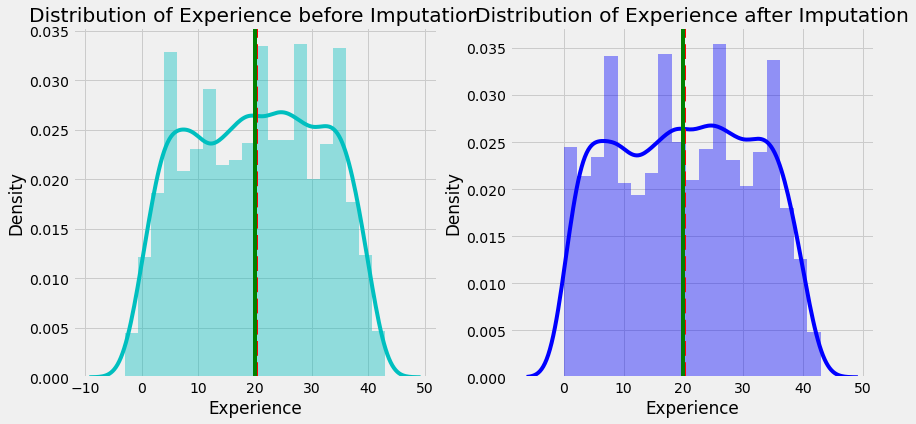

In [7]:
# Checking distribution of Experience column before and after imputation
fig = plt.figure(figsize=(12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(bank['Experience'], color = 'c', ax = ax).set_title('Distribution of Experience before Imputation')
ax.axvline(bank['Experience'].mean(), color = 'r', linestyle = '--', label = 'Mean')
ax.axvline(bank['Experience'].median(), color = 'g', linestyle = '-', label = 'Median')

replace_value = bank.loc[(bank['Age'] > 23) & (bank['Age'] <= 29) & (bank['Income'] > 12) & (bank['Income'] < 150) & 
         (bank['Personal Loan'] == 0) & (bank['CD Account'] == 0), 'Experience'].median()

# replacing the negative values with 2
bank['Experience'] = np.where(bank['Experience'] < 0, replace_value, bank['Experience'])

ax = fig.add_subplot(122)
sns.distplot(bank['Experience'], color = 'b', ax = ax).set_title('Distribution of Experience after Imputation')
ax.axvline(bank['Experience'].mean(), color = 'r', linestyle = '--', label = 'Mean')
ax.axvline(bank['Experience'].median(), color = 'g', linestyle = '-', label = 'Median')

In [8]:
# Updated five point summary of Experience column
bank['Experience'].describe()

count    5000.000000
mean       20.140400
std        11.405644
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

#### Observation 5 - Dealing with negative experience
The observation where experience is marked negative in the dataset is for people with **Age** range of 23-29 with median and mean being close to 24. These group of people who are marked negative experience in the dataset have **Income** ranging between 12 to 150, they didn't take **Personal Loan** that was offered to them in the earlier campaign and niether do they have **certificate of deposit** account with the bank. Used these findings to impute the negative values in experience. There's a slight but a negligible change in the value of mean from 20.1046 to 20.1404 whereas median value stays unaffected.

Text(0.5, 1.0, 'Distribution of Mortgage for taking Personal Loan')

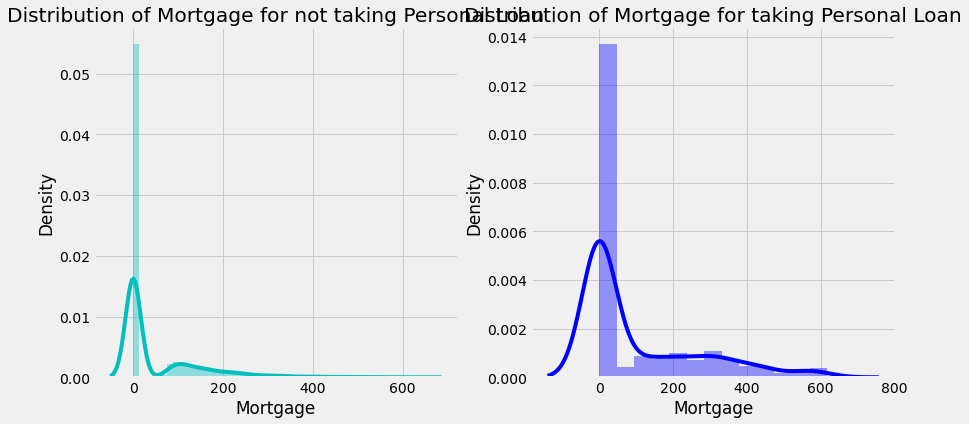

In [9]:
# Distribution of Mortgage
fig = plt.figure(figsize = (12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(bank[(bank['Personal Loan'] == 0)]['Mortgage'], color = 'c', 
             ax = ax).set_title('Distribution of Mortgage for not taking Personal Loan')

ax= fig.add_subplot(122)
sns.distplot(bank[(bank['Personal Loan'] == 1)]['Mortgage'], color = 'b', 
             ax = ax).set_title('Distribution of Mortgage for taking Personal Loan')

Text(0.5, 1.0, 'Distribution of CCAvg for taking Personal Loan')

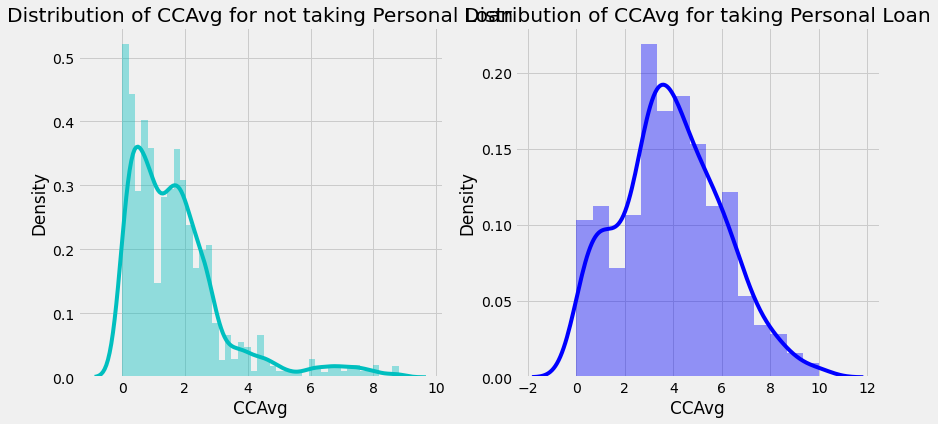

In [10]:
# Distribution of CCAvg
fig = plt.figure(figsize = (12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(bank[(bank['Personal Loan'] == 0)]['CCAvg'], color = 'c', 
             ax = ax).set_title('Distribution of CCAvg for not taking Personal Loan')

ax= fig.add_subplot(122)
sns.distplot(bank[(bank['Personal Loan'] == 1)]['CCAvg'], color = 'b', 
             ax = ax).set_title('Distribution of CCAvg for taking Personal Loan')

Text(0.5, 1.0, 'Distribution of Income for taking Personal Loan')

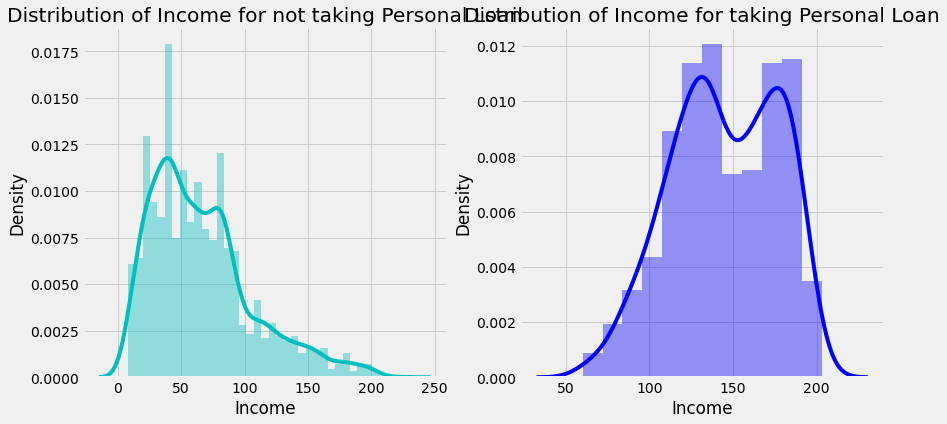

In [11]:
# Distribution of Income
fig = plt.figure(figsize = (12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(bank[(bank['Personal Loan'] == 0)]['Income'], color = 'c', 
             ax = ax).set_title('Distribution of Income for not taking Personal Loan')

ax= fig.add_subplot(122)
sns.distplot(bank[(bank['Personal Loan'] == 1)]['Income'], color = 'b', 
             ax = ax).set_title('Distribution of Income for taking Personal Loan')

#### Observation 6 - From distribution of skewed numerical variables
* Value 0 is the most frequently occuring value in Mortgage.

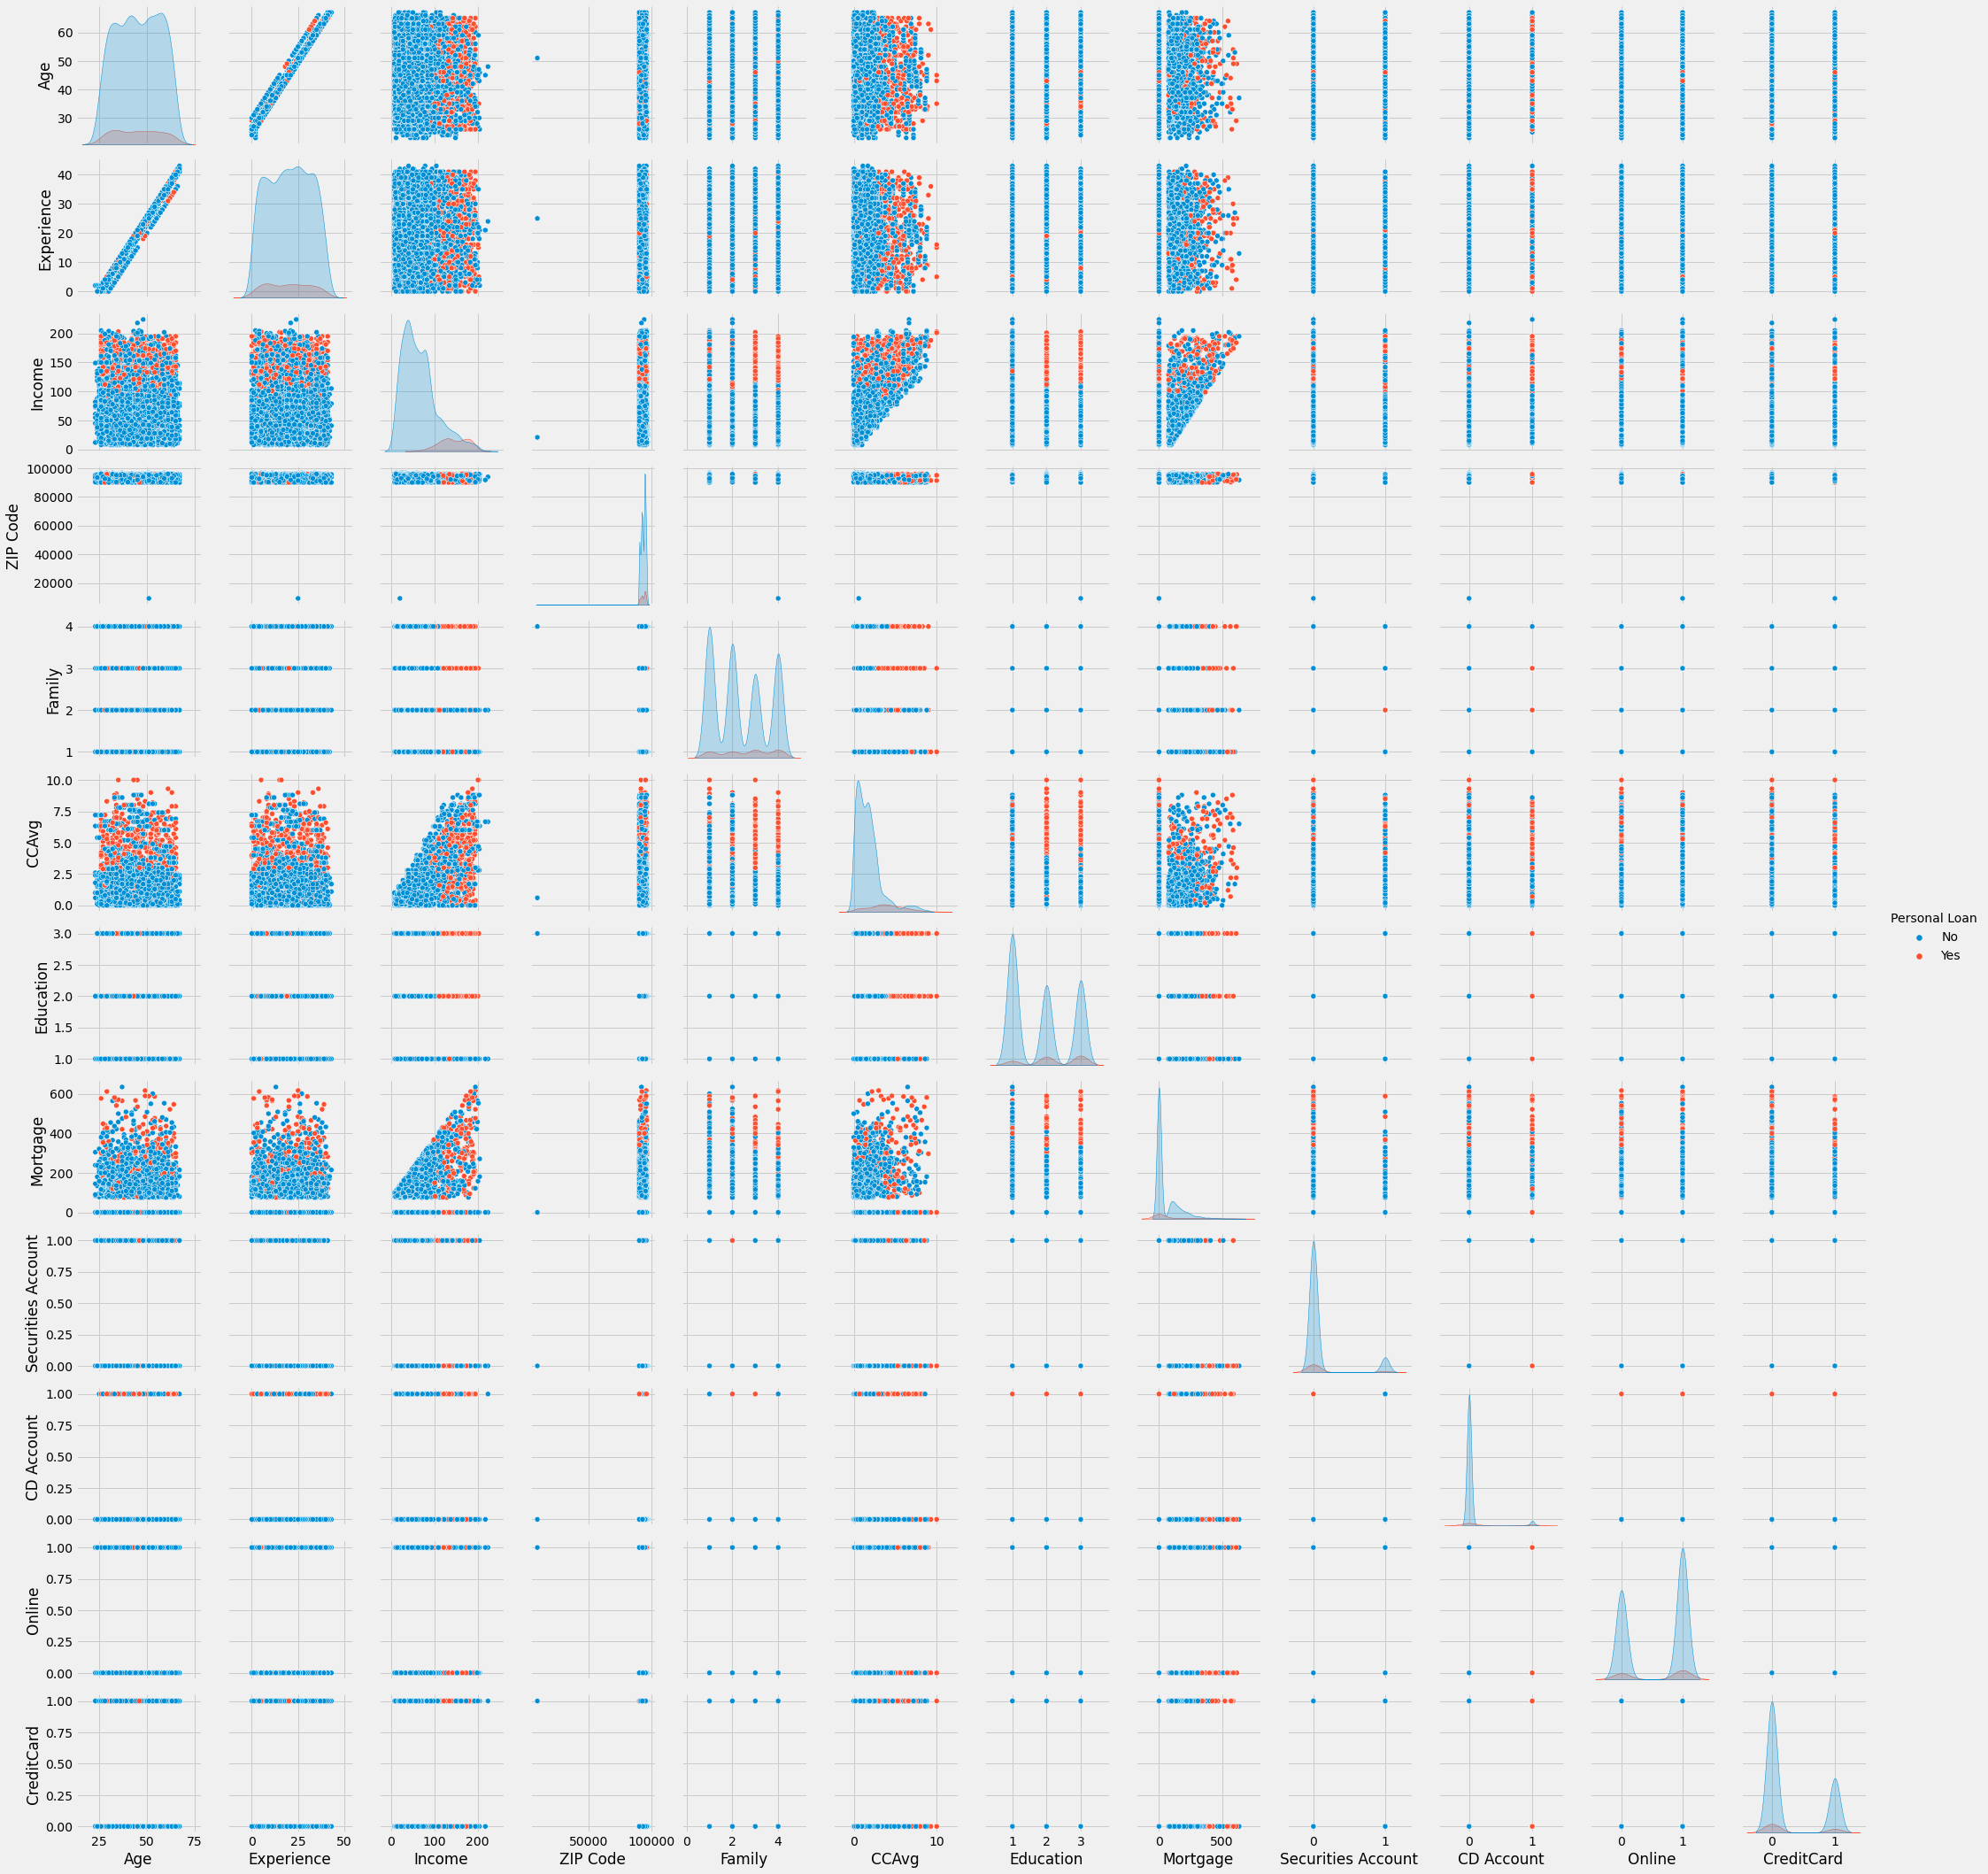

In [12]:
# Pairplot
pairplt = bank.drop('ID', axis = 1)
pairplt['Personal Loan'] = pairplt['Personal Loan'].replace({0: 'No', 1: 'Yes'})
sns.pairplot(pairplt, hue = 'Personal Loan')

#### Observation 7 - From pairplots
* `Age` and `Experience` have strong positive correlation.
* `ZIP Code` has one outlier value which is less than 10K.
* People those who are taking `Personal Loan` that was offered to them in earlier campaign have a significantly different `Income` distribution then people who aren't taking the personal loan.
* `CCAvg` i.e. Average spending on cards differs for people taking the personal loan and those who aren't taking the personal loan.
* `Family` size is also an important factor for people considering taking personal loan from bank that was offered in earlier campaign and so is `Mortgage`, `CD Account`, `Education` (to some extent) among other variables.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,385,51,25.0,21,9307,4,0.6,3,0,0,0,0,1,1


Text(0.5, 1.0, 'Outlier in Zip Code')

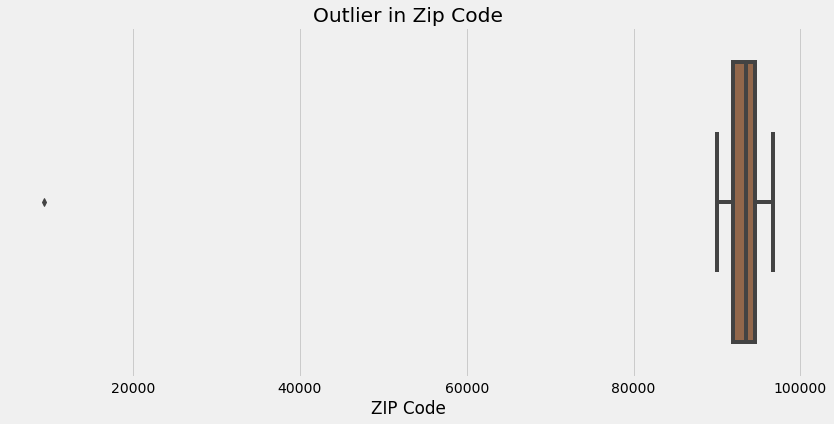

In [13]:
# Checking the outlier in ZIP Code
display(bank[bank['ZIP Code'] < 10000])
plt.figure(figsize = (12.8 , 6))
sns.boxplot(bank['ZIP Code'], palette = 'copper').set_title('Outlier in Zip Code')

#### Observation 8 - Zipcode
Since most of the `ZIP Code` are of 5 digits (possibly US), the above data point would be again be an error made while noting and it would seem logical to remove this particular row from the dataframe.

In [14]:
# dropping index 384
bank.drop(384, axis = 0, inplace = True)

Text(0.5, 1.0, 'Distribution of Income by Personal Loan')

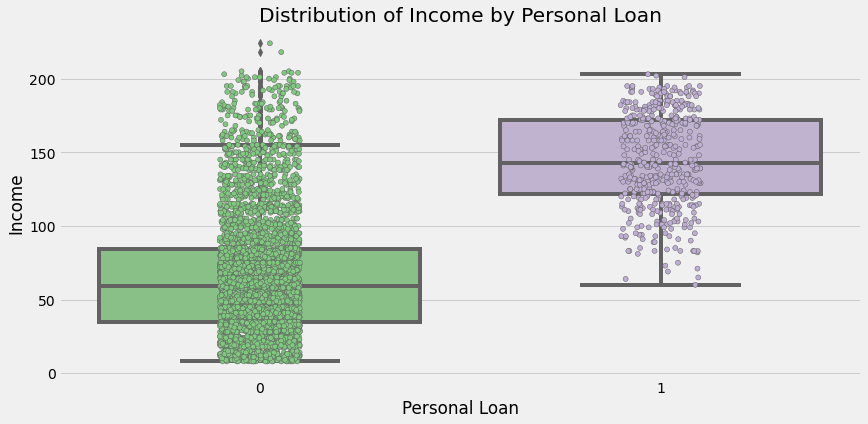

In [15]:
# Distribution of Income by Personal Loan
plt.figure(figsize = (12.8 , 6))
ax = sns.boxplot(x = 'Personal Loan', y = 'Income', palette = 'Accent', data = bank)
ax = sns.stripplot(x = 'Personal Loan', y = 'Income', palette = 'Accent', data = bank, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Distribution of Income by Personal Loan')

Text(0.5, 1.0, 'Distribution of Average Spending on Credit Card by Personal Loan')

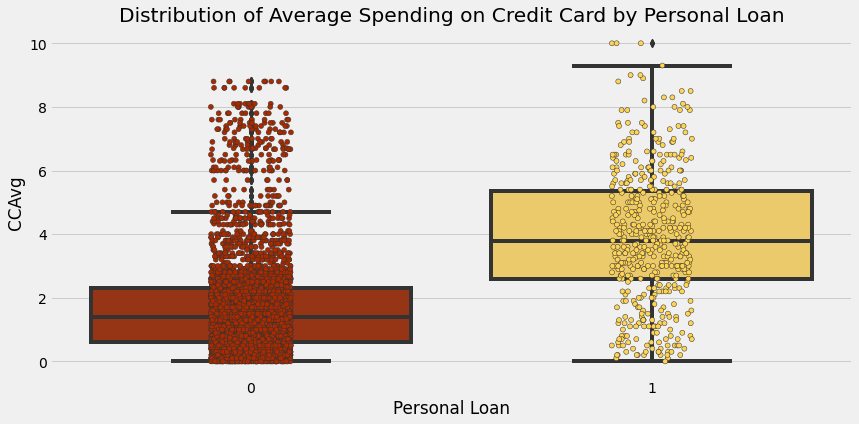

In [16]:
# Distribution of Average Spending on Credit Card by Personal Loan
plt.figure(figsize = (12.8 , 6))
ax = sns.boxplot(x = 'Personal Loan', y = 'CCAvg', palette = 'afmhot', data = bank)
ax = sns.stripplot(x = 'Personal Loan', y = 'CCAvg', palette = 'afmhot', data = bank, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Distribution of Average Spending on Credit Card by Personal Loan')

<Figure size 921.6x432 with 0 Axes>

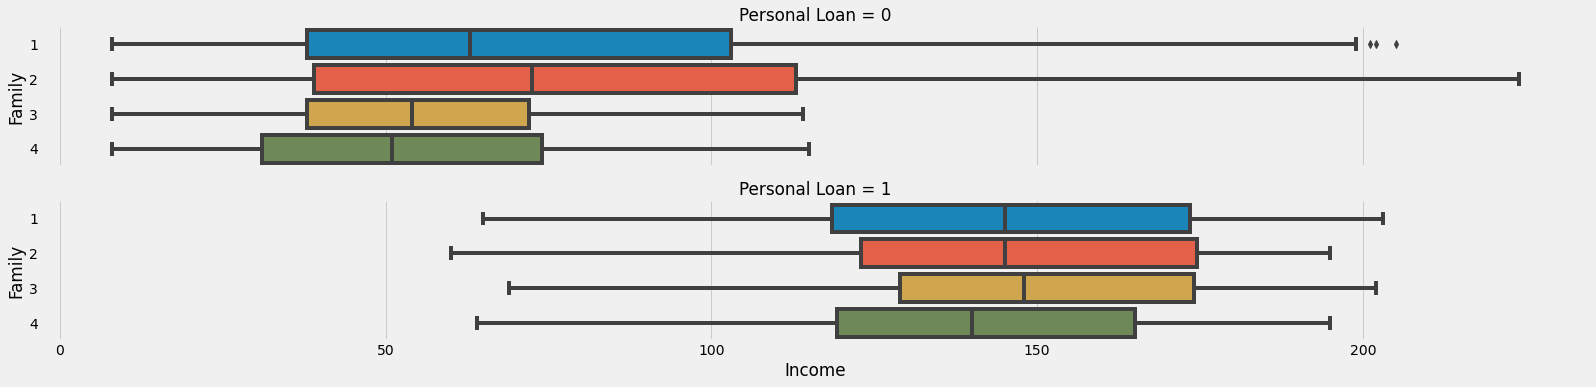

In [17]:
# Distribution of Family Size by Personal Loan and affect of Income
plt.figure(figsize = (12.8 , 6))
sns.catplot(x = 'Income', y = 'Family', row = 'Personal Loan', kind = 'box', orient = 'h', height = 2.8, aspect = 8, 
            data = bank)

<Figure size 921.6x432 with 0 Axes>

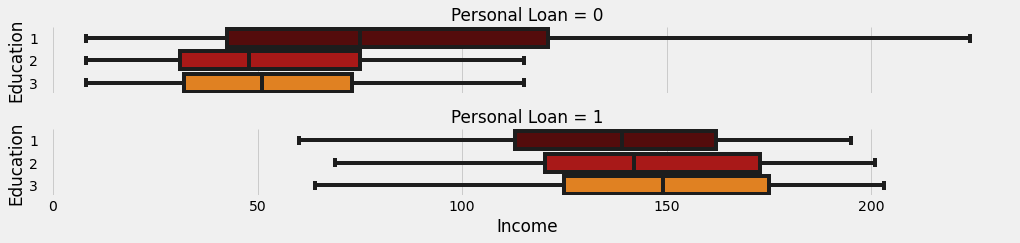

In [18]:
# Distribution of Education by Personal Loan and affect of Income
plt.figure(figsize = (12.8 , 6))
sns.catplot(x = 'Income', y = 'Education', row = 'Personal Loan', kind = 'box', orient = 'h', 
            height = 1.8, aspect = 8, palette = 'gist_heat', data = bank)

<AxesSubplot:xlabel='Education', ylabel='count'>

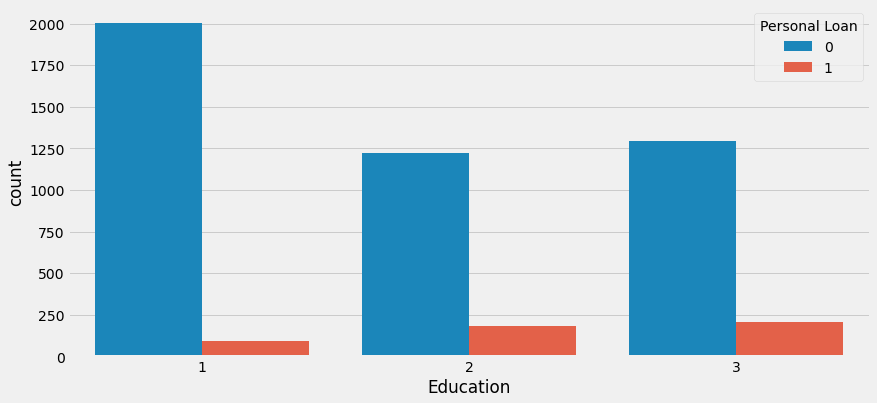

In [19]:
# Countplot of Education by Personal Loan
plt.figure(figsize = (12.8 , 6))
sns.countplot(x = 'Education', hue ='Personal Loan', data = bank)

<AxesSubplot:xlabel='CD Account', ylabel='count'>

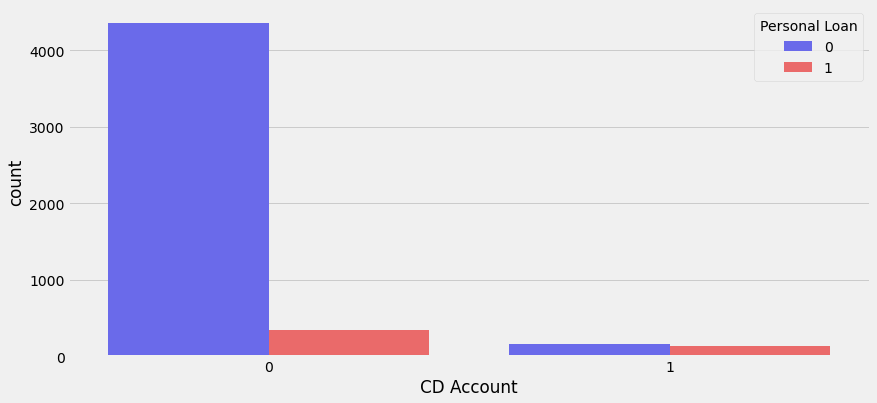

In [20]:
# Countplot of CD Account by Personal Loan
plt.figure(figsize = (12.8 , 6))
sns.countplot(x = 'CD Account', hue ='Personal Loan', palette = 'seismic', data = bank)

#### Observation 9 - Income, CCAvg, Family (size),  Mortgage, CD Account, Education and Personal Loan
* Higher **incomed** people in the dataset have taken loan from the bank in their last campaign.
* Higher the **income** more are the chances of people taking loan from the bank, irrespective of their family size.
* People with **family size** of 2 are most higher incomed people in the dataset, however that doesn't mean they are the ones taking most loans.
* **Average spending on credit cards** by people taking personal loan is higher than those who aren't taking personal loan.
* Customers whose **education level** is 1 (undergrad) is having more income.
* Customers who have taken the **personal loan** have the same **income** levels.
* Number of people taking **personal loan** increases with increase in **education** level.
* Most of the people who don't have **CD Account** don't take **personal loan** as well.
* For people with **CD Account**, the odds of taking **personal loan** are fairly similar to not taking.

In [21]:
# Checking number of unique values for categorical columns
cat_cols = ['ZIP Code', 'Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
bank[cat_cols].nunique()

ZIP Code              466
Family                  4
Education               3
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

#### Observation 10 - Removing columns from the further analysis
* Removing columns such as ID that does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. Neglecting this information for our model prediction.
* Removing ZIP Code from the analysis since it's a nominal variable and contains 466 unique values.

In [22]:
bank.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)
bank.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix of Data')

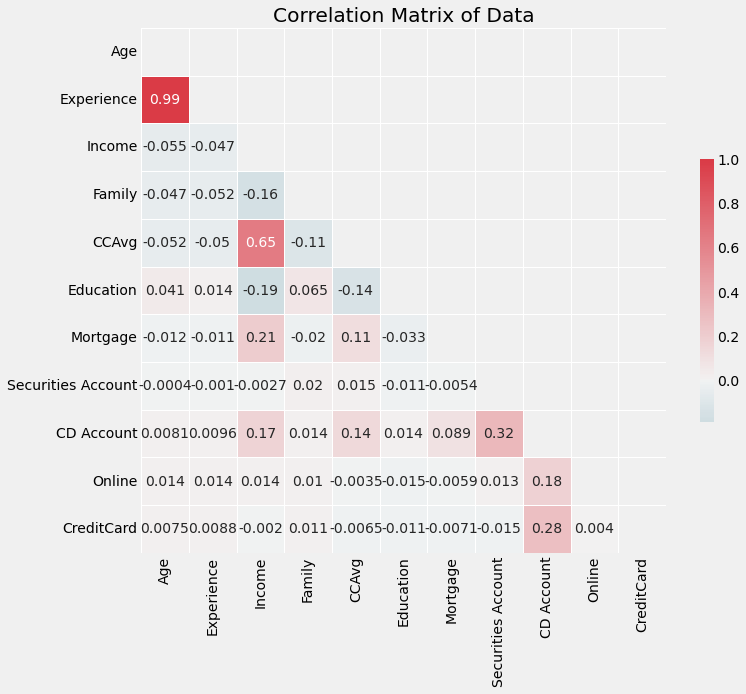

In [23]:
# Correlation matrix for all variables
corr = bank.drop('Personal Loan', axis = 1).corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix of Data')

In [24]:
# Filter for correlation value greater than 0.5
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.5) & (sort < 1)]

Experience  Age           0.993922
Age         Experience    0.993922
Income      CCAvg         0.645931
CCAvg       Income        0.645931
dtype: float64

In [25]:
# Absolute correlation of independent variables with 'Personal Loan' i.e. the target variable
absCorrwithDep = []
allVars = bank.drop('Personal Loan', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(bank['Personal Loan'].corr(bank[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
2,Income,0.502459
4,CCAvg,0.366864
8,CD Account,0.316344
6,Mortgage,0.142065
5,Education,0.136834
3,Family,0.061471
7,Securities Account,0.021932
1,Experience,0.008449
0,Age,0.007694
9,Online,0.006332


#### Observation 11 - Correlation Matrix
* **Age and Experience** are highly correlated with each other, as noted earlier during the EDA as well.
* **CCAvg and Income** are moderately correlated with each other.
* As we know that if a variable has a very low correlation with the target variable it's not going to be useful for the model prediction. While deciding whether which one out of **Age and Experience** to be dropped, we will drop Age column as it's correlation with the target variable is relatively less than Experience column.
* Further dropping **Online and CreditCard** since these columns also have relatively less correlation with the target column.

### Modelling
Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans

In [26]:
# dropping age column
bank.drop(['Age', 'Online', 'CreditCard'], axis = 1, inplace = True)
bank.columns

Index(['Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account'],
      dtype='object')

In [27]:
# Separating dependent and independent variables
X = bank.drop(['Personal Loan'], axis = 1)
y = bank['Personal Loan']

display(X.describe().T, X.shape, y.shape)

,count,mean,std,min,25%,50%,75%,max
Experience,4999.0,20.139428,11.406577,0.0,10.0,20.0,30.0,43.0
Income,4999.0,73.784757,46.032281,8.0,39.0,64.0,98.0,224.0
Family,4999.0,2.396079,1.147554,1.0,1.0,2.0,3.0,4.0
CCAvg,4999.0,1.938206,1.747731,0.0,0.7,1.5,2.5,10.0
Education,4999.0,1.880776,0.839804,1.0,1.0,2.0,3.0,3.0
Mortgage,4999.0,56.510102,101.720837,0.0,0.0,0.0,101.0,635.0
Securities Account,4999.0,0.104421,0.305836,0.0,0.0,0.0,0.0,1.0
CD Account,4999.0,0.060412,0.238273,0.0,0.0,0.0,0.0,1.0


(4999, 8)

(4999,)

#### Logistic Regression

In [28]:
# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3499, 8)

(1500, 8)

(3499,)

(1500,)

Logistic Regression Scores without Hyperparameter Tuning


LR accuracy for train set: 0.951
LR accuracy for test set: 0.943

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1354
           1       0.80      0.56      0.66       146

    accuracy                           0.94      1500
   macro avg       0.88      0.77      0.81      1500
weighted avg       0.94      0.94      0.94      1500


Confusion Matrix:
 [[1333   21]
 [  64   82]]

Accuracy Score:
 0.943


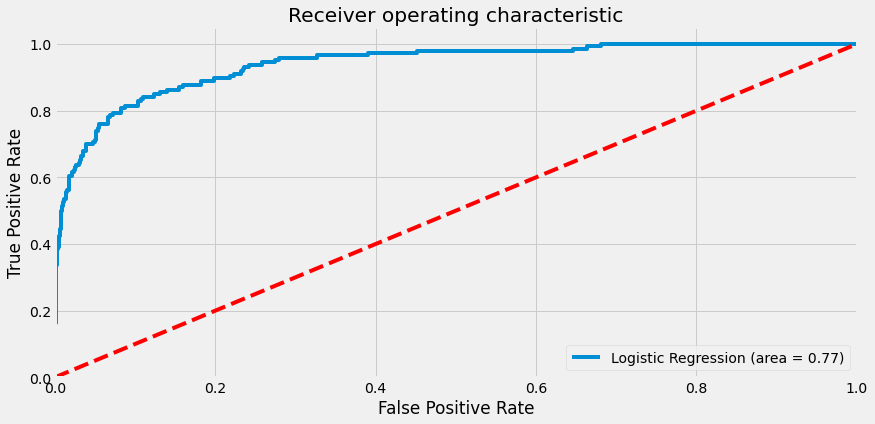

In [29]:
# LR model without hyperparameter tuning
LR = LogisticRegression()
LR.fit(X_train, y_train)

print('Logistic Regression Scores without Hyperparameter Tuning\n\n')
print('LR accuracy for train set: {0:.3f}'.format(LR.score(X_train, y_train)))
print('LR accuracy for test set: {0:.3f}'.format(LR.score(X_test, y_test)))

y_true, y_pred = y_test, LR.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
LR_roc_auc = roc_auc_score(y_true, LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, LR.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Logistic Regression (area = {})'.\
         format(LR_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

Logistic Regression Scores with Hyperparameter Tuning


Best Hyper Parameters are:  {'C': 1, 'max_iter': 140, 'penalty': 'l2'}
Best Score is:  0.952
LR accuracy for train set: 0.952
LR accuracy for test set: 0.943

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1354
           1       0.78      0.57      0.66       146

    accuracy                           0.94      1500
   macro avg       0.87      0.78      0.81      1500
weighted avg       0.94      0.94      0.94      1500


Confusion Matrix:
 [[1331   23]
 [  63   83]]

Accuracy Score:
 0.943


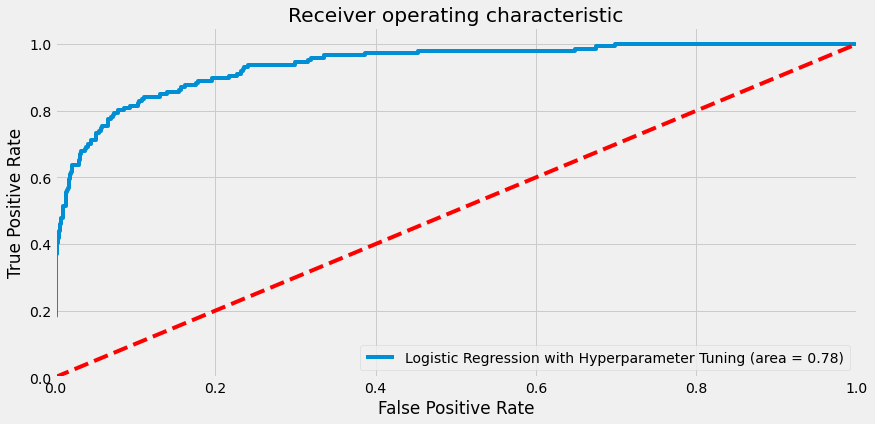

In [30]:
# LR with hyperparameter tuning
LR = LogisticRegression(random_state = 42)

params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 110, 120, 130, 140]}

skf = StratifiedKFold(n_splits = 10)
LR_hyper = GridSearchCV(LR, param_grid = params, n_jobs = -1, cv = skf)

LR_hyper.fit(X_train, y_train)

print('Logistic Regression Scores with Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', LR_hyper.best_params_)
print('Best Score is: ', LR_hyper.best_score_.round(3))

print('LR accuracy for train set: {0:.3f}'.format(LR_hyper.score(X_train, y_train)))
print('LR accuracy for test set: {0:.3f}'.format(LR_hyper.score(X_test, y_test)))

y_true, y_pred = y_test, LR_hyper.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
LR_hyper_roc_auc = roc_auc_score(y_true, LR_hyper.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, LR_hyper.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Logistic Regression with Hyperparameter Tuning (area = {})'.\
         format(LR_hyper_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

#### k-Nearest Neighbor Classifier

In [31]:
# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3499, 8)

(1500, 8)

(3499,)

(1500,)

k-Nearest Neighbor Classifier Scores without feature scaling


k-NN accuracy for train set: 0.941
k-NN accuracy for test set: 0.907

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1354
           1       0.54      0.30      0.39       146

    accuracy                           0.91      1500
   macro avg       0.74      0.64      0.67      1500
weighted avg       0.89      0.91      0.90      1500


Confusion Matrix:
 [[1317   37]
 [ 102   44]]

Accuracy Score:
 0.907


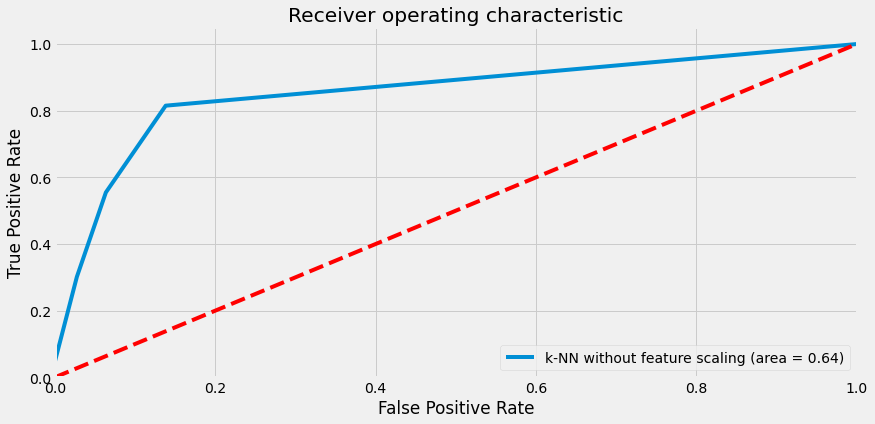

In [32]:
# KNN Model without scaling the features
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

print('k-Nearest Neighbor Classifier Scores without feature scaling\n\n')
print('k-NN accuracy for train set: {0:.3f}'.format(KNN.score(X_train, y_train)))
print('k-NN accuracy for test set: {0:.3f}'.format(KNN.score(X_test, y_test)))

y_true, y_pred = y_test, KNN.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
KNN_roc_auc = roc_auc_score(y_true, KNN.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, KNN.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'k-NN without feature scaling (area = {})'.\
         format(KNN_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

In [33]:
# Scaling the independent variables
Xs = X.apply(zscore)
display(Xs.describe().T, Xs.shape, y.shape)

,count,mean,std,min,25%,50%,75%,max
Experience,4999.0,-1.763387e-16,1.0001,-1.765774,-0.889000,-0.012225,0.864550,2.004358
Income,4999.0,4.835433e-17,1.0001,-1.429243,-0.755736,-0.212584,0.526102,3.263585
Family,4999.0,-1.765608e-16,1.0001,-1.216692,-1.216692,-0.345185,0.526321,1.397827
CCAvg,4999.0,-4.415130e-17,1.0001,-1.109095,-0.708535,-0.250753,0.321474,4.613181
Education,4999.0,7.271639e-16,1.0001,-1.048893,-1.048893,0.141980,1.332854,1.332854
Mortgage,4999.0,-3.350435e-16,1.0001,-0.555597,-0.555597,-0.555597,0.437416,5.687603
Securities Account,4999.0,-4.289205e-16,1.0001,-0.341461,-0.341461,-0.341461,-0.341461,2.928588
CD Account,4999.0,3.573190e-16,1.0001,-0.253567,-0.253567,-0.253567,-0.253567,3.943727


(4999, 8)

(4999,)

In [34]:
# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.3, random_state = 42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3499, 8)

(1500, 8)

(3499,)

(1500,)

k-Nearest Neighbor Classifier Scores after Scaling without Hyperparameter Tuning


k-NN accuracy for train set: 0.976
k-NN accuracy for test set: 0.961

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1354
           1       0.95      0.63      0.76       146

    accuracy                           0.96      1500
   macro avg       0.95      0.81      0.87      1500
weighted avg       0.96      0.96      0.96      1500


Confusion Matrix:
 [[1349    5]
 [  54   92]]

Accuracy Score:
 0.961


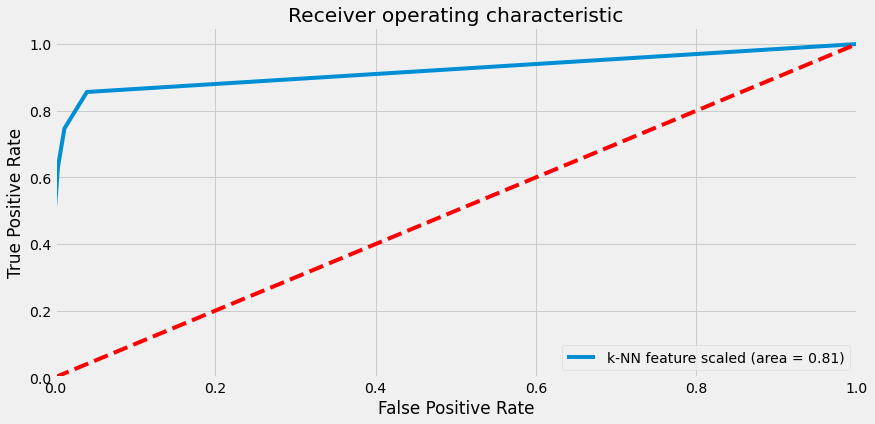

In [35]:
# KNN Model after scaling the features without hyperparameter tuning
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

print('k-Nearest Neighbor Classifier Scores after Scaling without Hyperparameter Tuning\n\n')
print('k-NN accuracy for train set: {0:.3f}'.format(KNN.score(X_train, y_train)))
print('k-NN accuracy for test set: {0:.3f}'.format(KNN.score(X_test, y_test)))

y_true, y_pred = y_test, KNN.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
KNN_roc_auc = roc_auc_score(y_true, KNN.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, KNN.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'k-NN feature scaled (area = {})'.\
         format(KNN_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

k-Nearest Neighbor Classifier Scores after Hyperparameter Tuning


Best Hyper Parameters are:  {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}

Best Score is:  0.97
k-NN accuracy for train set: 1.000
k-NN accuracy for test set: 0.964

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1354
           1       0.97      0.65      0.78       146

    accuracy                           0.96      1500
   macro avg       0.97      0.82      0.88      1500
weighted avg       0.96      0.96      0.96      1500


Confusion Matrix:
 [[1351    3]
 [  51   95]]

Accuracy Score:
 0.964


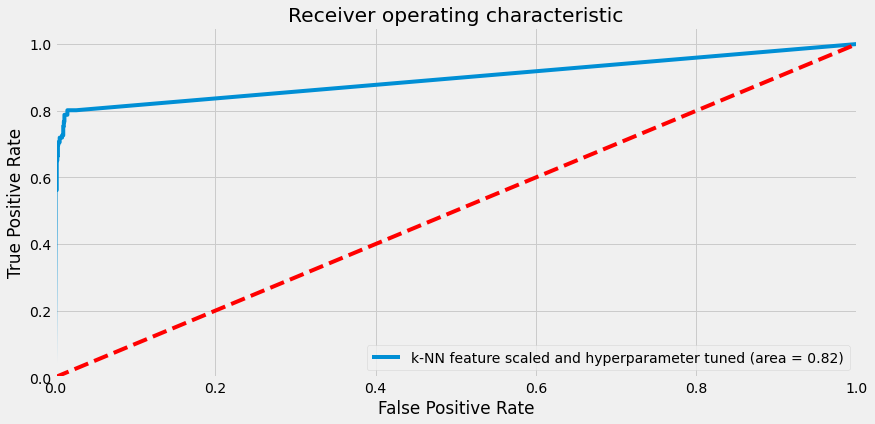

In [37]:
# KNN with hyperparameter tuning
KNN = KNeighborsClassifier(n_jobs = -1)

params = {'n_neighbors': list(range(1, 40, 2)), 'weights': ['uniform', 'distance'],
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

skf = StratifiedKFold(n_splits = 10, random_state = 42,shuffle=True)
KNN_hyper = GridSearchCV(KNN, param_grid = params, n_jobs = -1, cv = skf)

KNN_hyper.fit(X_train, y_train)

print('k-Nearest Neighbor Classifier Scores after Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', KNN_hyper.best_params_)
print('\nBest Score is: ', KNN_hyper.best_score_.round(3))

print('k-NN accuracy for train set: {0:.3f}'.format(KNN_hyper.score(X_train, y_train)))
print('k-NN accuracy for test set: {0:.3f}'.format(KNN_hyper.score(X_test, y_test)))

y_true, y_pred = y_test, KNN_hyper.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
KNN_hyper_roc_auc = roc_auc_score(y_true, KNN_hyper.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, KNN_hyper.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'k-NN feature scaled and hyperparameter tuned (area = {})'.\
         format(KNN_hyper_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

#### Naive Bayes classifier

Naive Bayes Classifier Scores


NB accuracy for train set: 0.883
NB accuracy for test set: 0.893

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1354
           1       0.46      0.59      0.52       146

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.91      0.89      0.90      1500


Confusion Matrix:
 [[1253  101]
 [  60   86]]

Accuracy Score:
 0.893


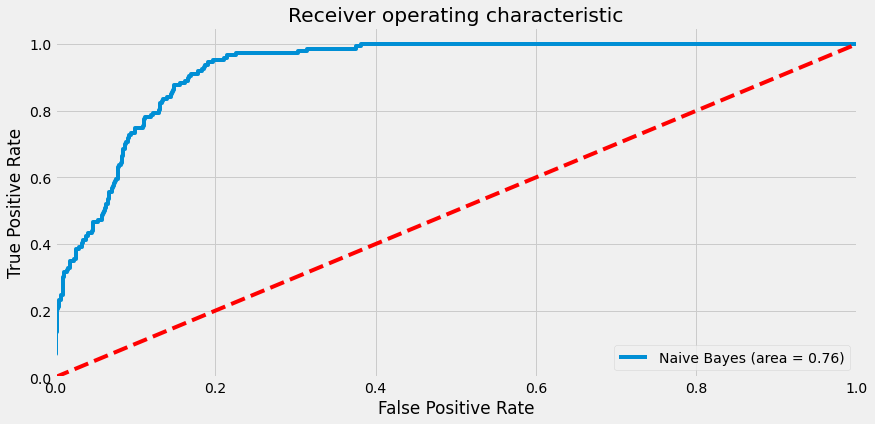

In [38]:
# Naive Bayes Model
NB = GaussianNB()
NB.fit(X_train, y_train)

print('Naive Bayes Classifier Scores\n\n')
print('NB accuracy for train set: {0:.3f}'.format(NB.score(X_train, y_train)))
print('NB accuracy for test set: {0:.3f}'.format(NB.score(X_test, y_test)))

y_true, y_pred = y_test, NB.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
NB_roc_auc = roc_auc_score(y_true, NB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, NB.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Naive Bayes (area = {})'.\
         format(NB_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

#### Oversampling and k-NN

In [39]:
# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.3, random_state = 42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3499, 8)

(1500, 8)

(3499,)

(1500,)

In [40]:
from imblearn import under_sampling, over_sampling
#from imblearn.over_sampling import SMOTE

In [41]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [43]:
sm = SMOTE(random_state = 42, sampling_strategy='minority')
oversample = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Before oversampling
unique, counts = np.unique(y_train, return_counts = True)
print(np.asarray((unique, counts)).T)

# After oversampling
unique, counts = np.unique(y_train_res, return_counts = True)
print(np.asarray((unique, counts)).T)

[[   0 3165]
 [   1  334]]
[[   0 3165]
 [   1 3165]]


k-Nearest Neighbor Classifier Scores With Oversampling (SMOTE) and Hyperparameter Tuning


Best Hyper Parameters are:  {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

Best Score is:  0.993
k-NN accuracy for train set: 1.000
k-NN accuracy for test set: 0.970

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1354
           1       0.93      0.75      0.83       146

    accuracy                           0.97      1500
   macro avg       0.95      0.87      0.91      1500
weighted avg       0.97      0.97      0.97      1500


Confusion Matrix:
 [[1346    8]
 [  37  109]]

Accuracy Score:
 0.97


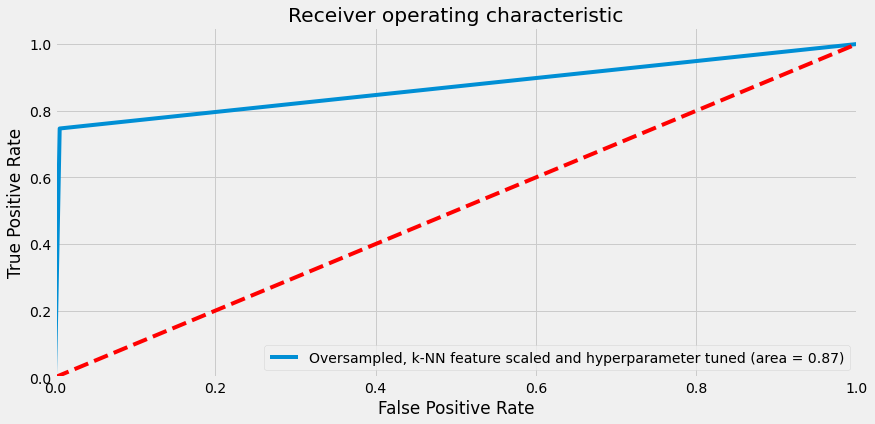

In [44]:
# KNN with hyperparameter tuning and Oversampling
KNN = KNeighborsClassifier(n_jobs = -1)

params = {'n_neighbors': list(range(1, 40, 2)), 'weights': ['uniform', 'distance'],
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

skf = StratifiedKFold(n_splits = 10, random_state = 42,shuffle=True)
KNN_hyper = GridSearchCV(KNN, param_grid = params, n_jobs = -1, cv = skf)

KNN_hyper.fit(X_train_res, y_train_res)

print('k-Nearest Neighbor Classifier Scores With Oversampling (SMOTE) and Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', KNN_hyper.best_params_)
print('\nBest Score is: ', KNN_hyper.best_score_.round(3))

print('k-NN accuracy for train set: {0:.3f}'.format(KNN_hyper.score(X_train_res, y_train_res)))
print('k-NN accuracy for test set: {0:.3f}'.format(KNN_hyper.score(X_test, y_test)))

y_true, y_pred = y_test, KNN_hyper.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
KNN_hyper_roc_auc = roc_auc_score(y_true, KNN_hyper.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, KNN_hyper.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Oversampled, k-NN feature scaled and hyperparameter tuned (area = {})'.\
         format(KNN_hyper_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

### Conclusion and understanding of models results

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. 

Most of the ML models works best when the number of classes are in equal proportion since they are designed to maximize accuracy and reduce error. Thus, they do not take into account the class distribution / proportion or balance of classes. In our dataset, the percentage of customer accepting the bank loan offered in campaign (class 1) is 9.6% whereas 90.4% of customers didn't accept the loan offered (class 0).

The confusion matrix is another metric that is often used to measure the performance of a classification algorithm, which contains information about the actual and the predicted class.

Metrics that can be calculated from confusion matrix:
* **Precision**: When it predicts the positive result, how often is it correct? i.e. limit the number of false positives.
* **Recall**: When it is actually the positive result, how often does it predict correctly? i.e. limit the number of false negatives.
* **f1-score**: Harmonic mean of precision and recall.

The confusion matrix for class 1 (Accepted) would look like:

|                        | Predicted: 0 (Not Accepted) | Predicted: 1 (Accepted)|
|------------------------|-----------------------------|------------------------|
|**Actual: 0 (Not Accepted)**| True Negatives              | False Positives        |
|**Actual: 1 (Accepted)**    | False Negatives             | True Positives         |

* **Precision would tell us cases where actually the personal loan wasn't accepted by the customer but we predicted it as accepted.**
* **Recall would tell us cases where actually the personal was accepted by the customer but we predicted it as not accepted.**

In our case, it would be recall that would hold more importance then precision. So choosing recall and f1-score which is the harmonic mean of both precision and recall as evaluation metric, particularly for class 1.

Further, AUC-ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, higher the AUC, better the model is at distinguishing between people accepting the loan and people not accepting the loan offered by the bank [source](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5).

Thus based on our evaluation metric, the scores of the models we tried are as below:

| Models      | Recall Score for Class 1 (%) | f1-score for Class 1 (%) | ROC AUC (%) | Accuracy (%) |
|-------------|--------------------------|----------------------|-----|----|
| **Logistic Regression** | 53 | 64 | 76 | 94.2 |
| **Logistic Regression with Hyperparameter Tuning** | 55 | 64 | 77 | 94 |
| **k-Nearest Neighbor without Feature Scaling** | 30 | 39 | 64 | 90.7 |
| **k-Nearest Neighbor with Feature Scaling** | 63 | 76 | 81 | 96.1 |
| ***k-Nearest Neighbor with Feature Scaling and Hyperparameter Tuning*** | ***66*** | ***79***| ***83*** | ***96.5*** |
| **Naive Bayes** | 59 | 52 | 76 | 89.3 |

It can be seen that **k-Nearest Neighbor with Feature Scaling and Hyperparameter Tuning** gives a better recall (66%), f1-score (79%), ROC AUC (83%) and Accuracy (96.5%) against others. Some of the advantages or the reason why k-NN performed better:

* Non-parametric algorithm which means there are no assumptions to be met to implement k-NN. Parametric models like logistic regression has lots of assumptions to be met by data before it can be implemented which is not the case with k-NN.
* k-NN is a memory-based approach that is the classifier immediately adapts as we collect new training data. It allows the algorithm to respond quickly to changes in the input during real-time use.
* k-NN works well with small number of input variables which in our case after dropping irrelevant were 8.

Additionally, we also tried **oversampling**, which is one of common ways to tackle the issue of imbalanced data. Over-sampling refers to various methods that aim to increase the number of instances from the underrepresented class in the data set. Out of the various methods, we chose Synthetic Minority Over-Sampling Technique (SMOTE). SMOTE’s main advantage compared to traditional random naive over-sampling is that by creating synthetic observations instead of reusing existing observations, classifier is less likely to overfit.

Results of oversampling (SMOTE) along with the best performing model from the above lot i.e. k-NN feature scaled and hyperparameter tuning:
* **Recall (class 1): 75% (an improvement of 9%)**
* **f1-score (class 1): 83% (an improvement of 4%)**
* **ROC AUC score: 87% (an improvement of 4%)**
* **Accuracy Score: 97% (an improvement of 0.5%)**

Based on the train and test scores, there were no cases of overfitting or underfitting in both:
* k-NN feature scaled and hyper parameter tuned
* Oversampled, k-NN feature scaled and hyper parameter tuned